In [91]:
import numpy as np
import matplotlib.pyplot as plt


In [92]:
theta = 1e-12
P_h = 0.4
states = np.arange(1,100)
policy = np.zeros(101,dtype=int)
V_function = np.zeros(101)
states

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [93]:
plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

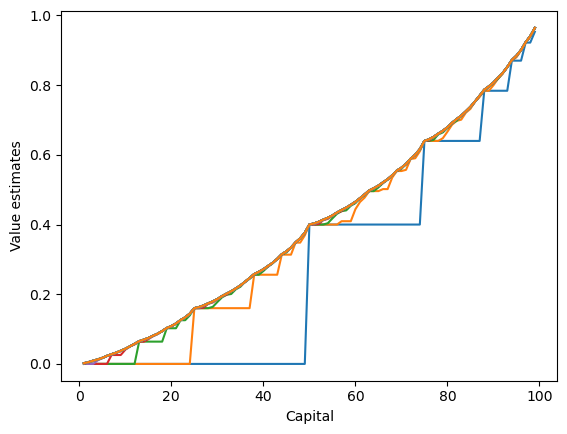

In [94]:
while True:
    δ = 0
    for s in states:
        v_old = V_function[s]
        action_values = np.zeros(100)
        best_action_value = 0
        best_action = 0
        for a in range(1,min(s,100-s)+1):
            s1 = s+a
            s2 = max(0,s-a)
            reward = 1 if s1 == 100 else 0
            action_values[a] += P_h*(reward + V_function[s1]) + (1-P_h)*V_function[s2]
        for a in range(0,100):
            if action_values[a] - theta > best_action_value:
                best_action_value = action_values[a]
                best_action = a
        V_function[s] = best_action_value
        policy[s] = best_action
        δ = max(δ,abs(v_old-V_function[s]))
    plt.plot(states,V_function[1:100])
    if δ<theta:
        break
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()


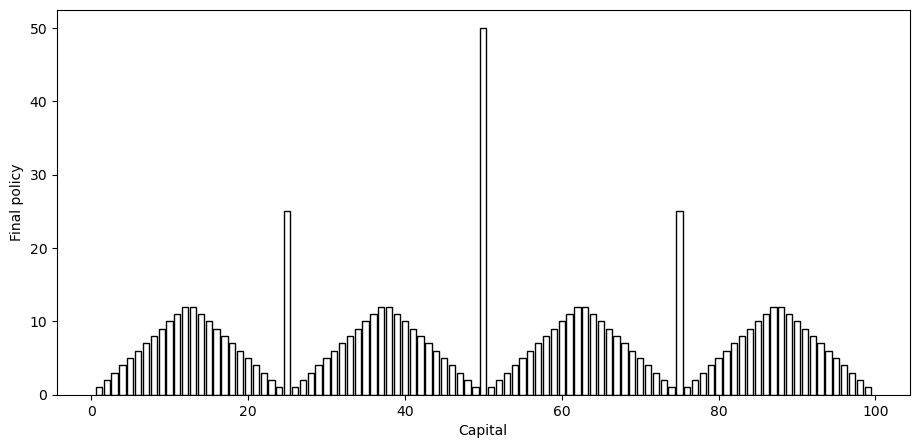

In [95]:
plt.figure(figsize=(11,5))
plt.bar(states,policy[1:100],color='w',edgecolor='k')
plt.xlabel('Capital')
plt.ylabel('Final policy')
plt.show()
